___
# Ciência dos Dados - PROJETO 1

## Pedro Henrique Daher
___

## Acesso a tecnologia de acordo com o nível de escolaridade e renda.


___
## Introdução

### Possuir celular, ter acesso a internet e a outros meios de tecnologia é algo que ao decorrer dos anos vem crescendo muito no mundo todo, porém uma considerável parcela da sociedade ainda não possui tais privilégios.
### Por meio dessa pesquisa, eu gostaria de observar o comportamento individual da população brasileira quanto ao acesso a tecnologia e verificar se a renda, o nível de escolaridade e diversos outros aspectos influenciam ou não em tal analise.  Utilizando os dados do PNAD 2011 e 2015 - Arquivo de pessoas, será possível escolher as variáveis necessárias para esta pesquisa e chegar a um resultado significativo, e ao final comparar se houve alguma evolução entre os anos de 2011 e 2015.

### Como meu objetivo é analisar o Brasil todo não vou me restringir a utilizar apenas alguns estados.

___
## Filtros da base de dados

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [8]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Daher\Downloads


In [9]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
tabela11=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
tabela15=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

### Nas próximas duas celulas vou filtrar minha base de dados com apenas as colunas que serão utilizados para o estudo em questão, além disso irei trocar os nomes das colunas e seus respectivos valores numericos serão substituidos pelo que eles realmente representam, ao final irei plotar um pequeno pedaço da tabela apenas para ficar mais fácil de ser visualizado o que será estudado

## 2011

In [10]:
cut11=tabela11.loc[:,['V0101','UF','V0302','V8005','V0601','V0602','V6002','V6003','V9532','V06111','V06112','V4720']]

cut11=cut11.rename(columns={'V0101': 'Ano'})
cut11=cut11.rename(columns={'UF': 'Estado'})
cut11=cut11.rename(columns={'V0302': 'Sexo'})
cut11=cut11.rename(columns={'V8005': 'Idade'})
cut11=cut11.rename(columns={'V0601': 'LerEscrever'})
cut11=cut11.rename(columns={'V0602': 'FrequentaEscola'})
cut11=cut11.rename(columns={'V6002': 'RedeDeEnsino'})
cut11=cut11.rename(columns={'V6003': 'GrauDoCurso'})
cut11=cut11.rename(columns={'V9532': 'RendimentoMensalDotrabalho'}) #Quantitativa
cut11=cut11.rename(columns={'V06111': 'UtilizouInternetNoUltimoMês'})
cut11=cut11.rename(columns={'V06112': 'PossuiCelular'})
cut11=cut11.rename(columns={'V4720': 'RendimentoMensalTotal'}) #Quantitativa

cut11.Sexo=cut11.Sexo.astype("category")
cut11.Sexo.cat.categories=('Masculino','Feminino')
cut11.LerEscrever=cut11.LerEscrever.astype("category")
cut11.LerEscrever.cat.categories=('Sim','Não')
cut11.FrequentaEscola=cut11.FrequentaEscola.astype("category")
cut11.FrequentaEscola.cat.categories=('Sim','Não')
cut11.RedeDeEnsino=cut11.RedeDeEnsino.astype("category")
cut11.RedeDeEnsino.cat.categories=('Pública','Privada') 
cut11.GrauDoCurso=cut11.GrauDoCurso.astype("category")
cut11.GrauDoCurso.cat.categories=('Regular do ensino fundamental',"Regular do ensino médio","Educação de jovens e adultos ou supletivo do ensino fundamental", "Educação de jovens e adultos ou supletivo do ensino médio","Superior - de graduaçã0","Alfabetização de jovens e adultos","Creche","Classe de alfabetização - CA"," Maternal, jardim de infância etc.","Pré-vestibular","Mestrado ou doutorado")
cut11.UtilizouInternetNoUltimoMês=cut11.UtilizouInternetNoUltimoMês.astype("category")
cut11.UtilizouInternetNoUltimoMês.cat.categories=('Sim','Não')
cut11.PossuiCelular=cut11.PossuiCelular.astype("category")
cut11.PossuiCelular.cat.categories=('Sim','Não')

cut11.head(5)

,Ano,Estado,Sexo,Idade,LerEscrever,FrequentaEscola,RedeDeEnsino,GrauDoCurso,RendimentoMensalDotrabalho,UtilizouInternetNoUltimoMês,PossuiCelular,RendimentoMensalTotal
0,2011,11,Masculino,49,Sim,Não,NaN,NaN,1.000000e+12,Não,Sim,1.000000e+12
1,2011,11,Feminino,33,Sim,Sim,Privada,Superior - de graduaçã0,NaN,Sim,Sim,0.000000e+00
2,2011,11,Feminino,15,Sim,Sim,Pública,Regular do ensino médio,NaN,Sim,Não,0.000000e+00
3,2011,11,Masculino,9,Sim,Sim,Pública,Regular do ensino fundamental,NaN,NaN,NaN,NaN
4,2011,11,Feminino,51,Sim,Não,NaN,NaN,2.800000e+03,Não,Sim,5.300000e+03


## 2015

In [11]:
cut15=tabela15.loc[:,['V0101','UF','V0302','V8005','V0601','V0602','V6002','V6003','V9532','V06111','V06112','V4720']]

cut15=cut15.rename(columns={'V0101': 'Ano'})
cut15=cut15.rename(columns={'UF': 'Estado'})
cut15=cut15.rename(columns={'V0302': 'Sexo'})
cut15=cut15.rename(columns={'V8005': 'Idade'})
cut15=cut15.rename(columns={'V0601': 'LerEscrever'})
cut15=cut15.rename(columns={'V0602': 'FrequentaEscola'})
cut15=cut15.rename(columns={'V6002': 'RedeDeEnsino'})
cut15=cut15.rename(columns={'V6003': 'GrauDoCurso'})
cut15=cut15.rename(columns={'V9532': 'RendimentoMensalDoTrabalho'}) #Quantitativa
cut15=cut15.rename(columns={'V06111': 'UtilizouInternetNoUltimoMês'})
cut15=cut15.rename(columns={'V06112': 'PossuiCelular'})
cut15=cut15.rename(columns={'V4720': 'RendimentoMensalTotal'}) #Quantitativa

cut15.Sexo=cut15.Sexo.astype("category")
cut15.Sexo.cat.categories=('Masculino','Feminino')
cut15.LerEscrever=cut15.LerEscrever.astype("category")
cut15.LerEscrever.cat.categories=('Sim','Não')
cut15.FrequentaEscola=cut15.FrequentaEscola.astype("category")
cut15.FrequentaEscola.cat.categories=('Sim','Não')
cut15.RedeDeEnsino=cut15.RedeDeEnsino.astype("category")
cut15.RedeDeEnsino.cat.categories=('Pública','Privada') 
cut15.GrauDoCurso=cut15.GrauDoCurso.astype("category")
cut15.GrauDoCurso.cat.categories=('Regular do ensino fundamental',"Regular do ensino médio","Educação de jovens e adultos ou supletivo do ensino fundamental", "Educação de jovens e adultos ou supletivo do ensino médio","Superior - de graduaçã0","Alfabetização de jovens e adultos","Creche","Classe de alfabetização - CA"," Maternal, jardim de infância etc.","Pré-vestibular","Mestrado ou doutorado")
cut15.UtilizouInternetNoUltimoMês=cut15.UtilizouInternetNoUltimoMês.astype("category")
cut15.UtilizouInternetNoUltimoMês.cat.categories=('Sim','Não')
cut15.PossuiCelular=cut15.PossuiCelular.astype("category")
cut15.PossuiCelular.cat.categories=('Sim','Não')
cut15.head()

,Ano,Estado,Sexo,Idade,LerEscrever,FrequentaEscola,RedeDeEnsino,GrauDoCurso,RendimentoMensalDoTrabalho,UtilizouInternetNoUltimoMês,PossuiCelular,RendimentoMensalTotal
0,2015,11,Masculino,23,Sim,Não,NaN,NaN,800.0,Sim,Sim,800.0
1,2015,11,Feminino,23,Sim,Não,NaN,NaN,1150.0,Sim,Sim,1150.0
2,2015,11,Feminino,35,Sim,Sim,Privada,Superior - de graduaçã0,880.0,Sim,Sim,880.0
3,2015,11,Masculino,34,Sim,Não,NaN,NaN,3000.0,Sim,Sim,3000.0
4,2015,11,Feminino,11,Sim,Sim,Privada,Regular do ensino fundamental,NaN,Sim,Sim,0.0


### 1) Para começarmos a analisar os dados, primeiro irei observer algumas variáveis que serão essenciais para tomarmos decisões futuras, basicamente irão mostrar percentuais de pessoas da população brasileira quanto aos aspectos: saber ler e escrever, frequentar escola, qual a rede de ensino e o grau do curso.

## Saber ler e escrever

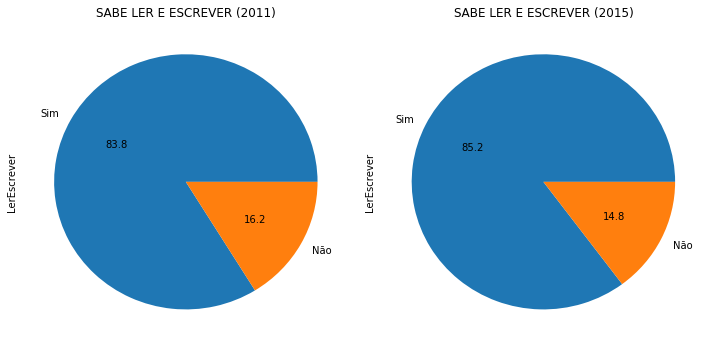

In [24]:
d11=(cut11.LerEscrever.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d11.plot(kind='pie',title='SABE LER E ESCREVER (2011)',autopct='%.1f')                        

d15=(cut15.LerEscrever.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d15.plot(kin d='pie',title='SABE LER E ESCREVER (2015)',autopct='%.1f')                        
                      
plt.tight_layout()
plt.show()

## Frequenta escola

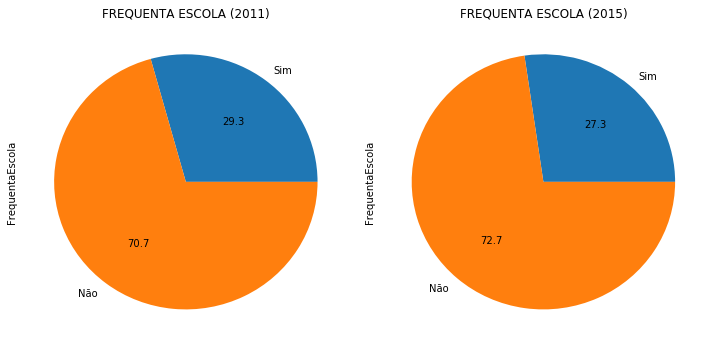

In [26]:
d11=(cut11.FrequentaEscola.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d11.plot(kind='pie',title='FREQUENTA ESCOLA (2011)',autopct='%.1f')                        

d15=(cut15.FrequentaEscola.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d15.plot(kind='pie',title='FREQUENTA ESCOLA (2015)',autopct='%.1f')                        
                      
plt.tight_layout()
plt.show()

## Rede de Ensino: Pública ou Privada

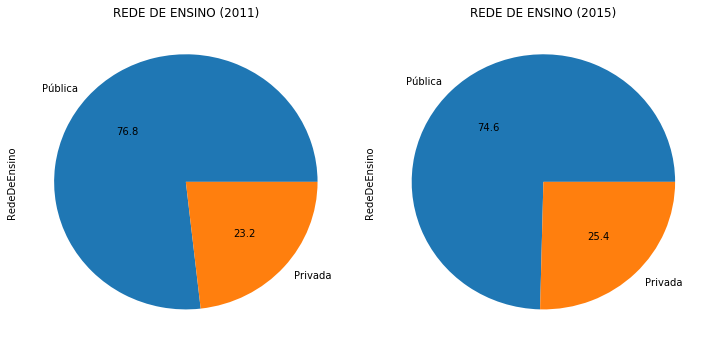

In [22]:
d11=(cut11.RedeDeEnsino.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig=plt.figure(figsize=(15, 5))
plt.subplot(131)
plot=d11.plot(kind='pie',title='REDE DE ENSINO (2011)',autopct='%.1f')                        

d15=(cut15.RedeDeEnsino.value_counts(sort=False, normalize=True)*100).round(decimals=1)
plt.subplot(132)
plot=d15.plot(kind='pie',title='REDE DE ENSINO (2015)',autopct='%.1f')                        
                      
plt.tight_layout()
plt.show()

## Grau do Curso

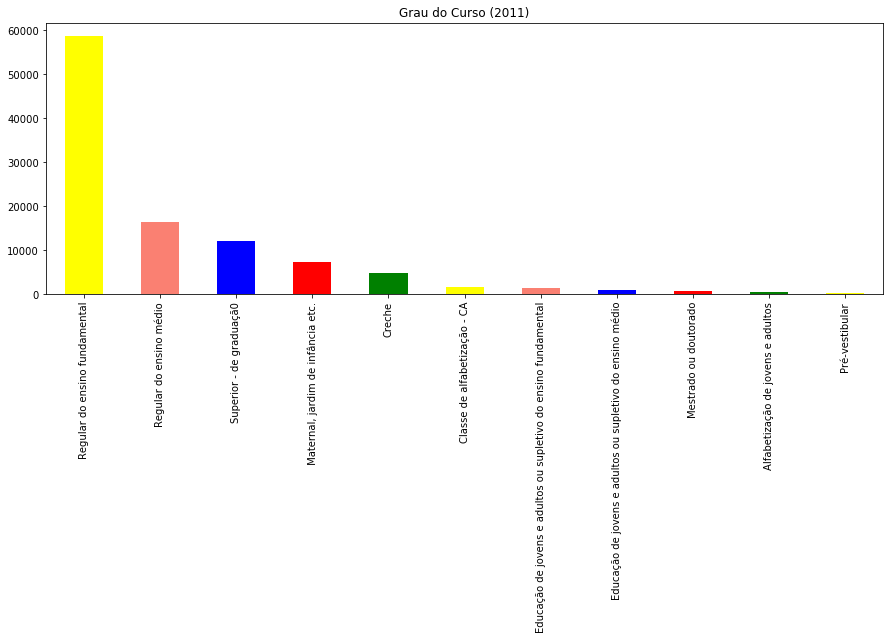

In [46]:
fig=plt.figure(figsize=(15, 5))
evc = cut11.GrauDoCurso.value_counts()
evc.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False, title='Grau do Curso (2011)')
plt.show()

### Observações: Com essas informações que retiramos a partir da analise dos gráficos acima, podemos concluir que mais de 80% da população sabe ler e escrever, 70% não frequenta escola e que a rede privada concentra apenas 20% da população dos estudantes brasileiros.
### A partir desses resultados, daqui pra frente não irei considerar mais a coluna "Frequentar Escola" pois existem pessoas que ja frequentaram escola e não frequentam mais por isso não constam nesses dados, com isso ela será irrelevante nos nossos estudos.
### Entretanto as colunas "Rede de Ensino" e "Ler e escrever" serão essenciais para concluirmos os resultados, assim como o "Grau do Curso".
### Outro iteração importante que irei realizar a partir de agora é de adotar apenas um dos anos, pois como visto nos gráficos acima, a variação dos dados escolhidos entre 2011 e 2015 foi pequena. Adotaremos apenas 2015, já que é mais recente, depois retomaremos com os dois anos para fazer algumas comparações.

## Trabalhando com variáveis do tipo Quantitativa

### Para trabalharmos com variáveis quantitativas, devemos fazer um arrange com as faixas que queremos trabalhar. Por isso antes disso vou dar o comando describe( ) na coluna desejada, para depois escolher como vão ser ordenadas as faixas.

In [14]:
cut11.RendimentoMensalDotrabalho.describe()

count    1.573390e+05
mean     3.795626e+10
std      1.910911e+11
min      1.000000e+00
25%      5.450000e+02
50%      8.000000e+02
75%      1.500000e+03
max      1.000000e+12
Name: RendimentoMensalDotrabalho, dtype: float64

### O valor máximo é muito mais alto em ordem de grandeza do que 75%, por isso quando eu for montar o arrange, vou usar como valor máximo 3000, que é um pouco acima de 75% (1500), para não distorcer meus gráficos. Além disso essa simplificação não afetará os resultados pois são poucos os valores muito altos, então sua retirada não será prejudicial.
### Vou dividir minhas faixas de 100 em 100, pois assim consigo um número de faixas bom para análises.

## Rendimento Mensal do Trabalho

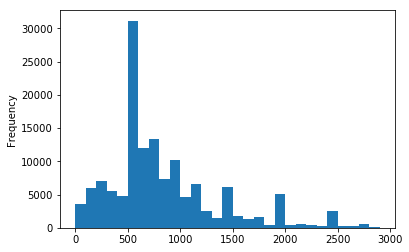

In [44]:
FaixasRenda = arange(1,3000,100)
Renda_cat = pd.cut(cut11.RendimentoMensalDotrabalho,bins = FaixasRenda,right = True)
ut1 = (Renda_cat.value_counts(sort = False, normalize = True)*100).round(decimals=1)
#print(ut1,"\n")
cut11.RendimentoMensalDotrabalho.plot.hist(bins = FaixasRenda)

## Rendimento Mensal Total

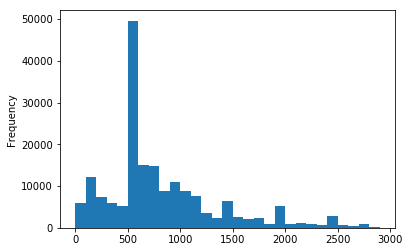

In [45]:
FaixasRenda = arange(1,3000,100)
Renda_cat = pd.cut(cut11.RendimentoMensalTotal,bins = FaixasRenda,right = True)
ut1 = (Renda_cat.value_counts(sort = False, normalize = True)*100).round(decimals=1)
#print(ut1,"\n")
cut11.RendimentoMensalTotal.plot.hist(bins = FaixasRenda)

### Observação: Como as colunas "Rendimento Mensal Total" e "Rendimento Mensal do Trabalho" são práticamente iguais, vou considerar a partir de agora apenas uma delas, que será Rendimento Mensal Total".

## 2) Agora que ja sabemos o comportamento básico da população brasileira em tais aspectos, vamos começar a relacionar as variáveis que realmente importam para o nosso trabalho, e a partir delas tomar decisões mais aprofundadas e que buscam responder algumas perguntas pertinentes.

### Para começar,  vou montar um gráfico Stacked e utilizar o crosstab para comparar duas variáveis, possuir celular e qual a rede de ensino, em frequencias relativas.

In [35]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [55]:
ct3=pd.crosstab(cut15.RedeDeEnsino,cut15.PossuiCelular,margins=True,rownames=['Educação'], colnames=['Celular']).apply(percConvert, axis=0)
ct3

Celular,Sim,Não,All
Educação,,,
Pública,67.0,94.0,74.0
Privada,33.0,6.0,26.0
All,100.0,100.0,100.0


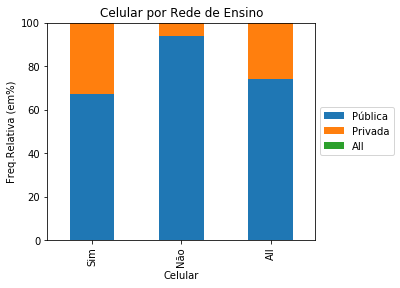

In [39]:
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Celular por Rede de Ensino')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Conclusão: O gráfico fica confuso e podemos tirar conclusões equivocadas a partir dele. Mesmo o gráfico mostrando frequências relativas, fica entendido que maior parte das pessoas que possuem celular, estudam em escolas públicas, de acordo com o gráfico, isso é verdade. Porém existem mais pessoas estudando em escolas públicas, por isso o número de pessoas que possuem celulares também é maior. Devemos olhar de outra maneira se quisermos analisar esses dados de maneira mais eficaz e certeira para nossas perguntas.

## Pessoas com maior grau de escolaridade, possuem maior renda? 
### Para responder essa pergunta, filtrei a base de dados e nela selecionei apenas o grau do curso (estou comparando pessoas que concluiram o ensino médio com pessoas com nível superior de graduação completo) e o rendimento mensal total.

In [12]:
EM=cut15[(cut15.GrauDoCurso == ["Regular do ensino médio"])& (cut15.RendimentoMensalTotal < 100000000)] 
EM.RendimentoMensalTotal.describe()
#Total de pessoas com ensino médio completo 15000

count    15552.000000
mean       152.197145
std        441.152600
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30000.000000
Name: RendimentoMensalTotal, dtype: float64

In [16]:
#dfc = EM.RendimentoMensalTotal.value_counts()
#dfc.plot(kind='bar', color=('blue', 'red'), legend=False)

In [17]:
ES=cut15[(cut15.GrauDoCurso == ["Superior - de graduaçã0"] )& (cut15.RendimentoMensalTotal < 100000000)]
ES.RendimentoMensalTotal.describe()
#Total de pessoas com nível superior de gradução 13000

count    13300.000000
mean      1045.565940
std       1501.104443
min          0.000000
25%          0.000000
50%        788.000000
75%       1500.000000
max      27700.000000
Name: RendimentoMensalTotal, dtype: float64

### Conclusão: Pessoas com maior grau de escolaridade, possuem maior renda. Nossa base de dados mostrou que a média do rendimento mensal das pessoas que possuem o nível superior concluído (1045,00) é maior do que as que apenas concluiram o ensino médio (152,00). 

## Pessoas com maior renda possuem maior acesso a tecnologia?

### Para não ocorrer o mesmo erro de interpretação do gráfico Stacked, agora nessa comparação, vou utilizar outro método, mais justo, que consiste em:

In [28]:
#cut15[(cut15.RendimentoMensalTotal < 100000000)& (cut15.RendimentoMensalTotal > 1500)]
#Total de colunas: 65224
#cut15[(cut15.RendimentoMensalTotal > 1)& (cut15.RendimentoMensalTotal < 1500)]
#Total de colunas: 139487

In [21]:
Maior=cut15[(cut15.UtilizouInternetNoUltimoMês == ["Sim"])& (cut15.PossuiCelular == ["Sim"]) & (cut15.RendimentoMensalTotal < 100000000)& (cut15.RendimentoMensalTotal > 1500)]
Maior.RendimentoMensalTotal.describe()

count     46813.000000
mean       4209.425096
std        4730.425291
min        1502.000000
25%        2000.000000
50%        2900.000000
75%        4500.000000
max      200000.000000
Name: RendimentoMensalTotal, dtype: float64

In [23]:
Menor=cut15[(cut15.UtilizouInternetNoUltimoMês == ["Sim"])& (cut15.PossuiCelular == ["Sim"]) & (cut15.RendimentoMensalTotal > 1)& (cut15.RendimentoMensalTotal < 1500)]
Menor.RendimentoMensalTotal.describe()

count    60066.00000
mean       842.45147
std        341.24398
min          3.00000
25%        750.00000
50%        850.00000
75%       1100.00000
max       1498.00000
Name: RendimentoMensalTotal, dtype: float64

In [34]:
maior=46813/65224
menor=60066/139487
print(maior*100)
print(menor*100)

71.77266037041579
43.06207746958498


### Conclusão: Dividi, de acordo com o gráfico de rendimento mensal, em dois grupos, pessoas com renda menor que 1500,00 reais e pessoas com renda maior que 1500,00 reais e descobri quantas pessoas tinham em cada grupo. Depois disso analisei apenas as pessoas que possuem acesso a internet e têm celular nesses dois grupos de rendas, e o resultado foi que pessoas com maior renda possuem mais acesso a tecnologia (71% das pessoas com renda maior que 1500 reais tem acesso a internet e possuem celular) do que as pessoas com baixa renda (43% das pessoas que possuem renda menor que 1500 reais têm acesso a internet e possuem celular)

## A utilização de internet / possuir celular subiu nos ultimos anos?

In [45]:
net15=cut15[(cut15.UtilizouInternetNoUltimoMês == ["Sim"])]
net15.UtilizouInternetNoUltimoMês.describe()

count     177667
unique         1
top          Sim
freq      177667
Name: UtilizouInternetNoUltimoMês, dtype: object

In [46]:
net11=cut11[(cut11.UtilizouInternetNoUltimoMês == ["Sim"])]
net11.UtilizouInternetNoUltimoMês.describe()

count     141820
unique         1
top          Sim
freq      141820
Name: UtilizouInternetNoUltimoMês, dtype: object

In [47]:
net15=cut15[(cut15.PossuiCelular == ["Sim"])]
net15.PossuiCelular.describe()

count     243444
unique         1
top          Sim
freq      243444
Name: PossuiCelular, dtype: object

In [48]:
net11=cut11[(cut11.PossuiCelular == ["Sim"])]
net11.PossuiCelular.describe()

count     214191
unique         1
top          Sim
freq      214191
Name: PossuiCelular, dtype: object

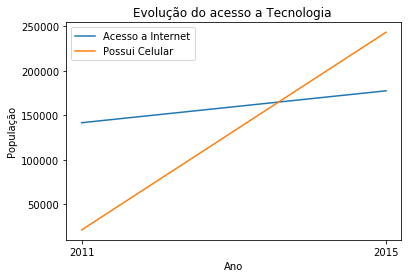

In [54]:
netcount=[141820,177667]
celcount=[21419,243444]
anos=[2011,2015]

plt.plot(anos,netcount)
plt.plot(anos,celcount)

plt.legend(["Acesso a Internet","Possui Celular"])
plt.xlabel("Ano")
plt.ylabel("População")
plt.title("Evolução do acesso a Tecnologia ")
plt.xticks([2011,2015])
plt.show()

___
## Conclusão 

### Com todas as analises de dados e de gráficos feitas acima, consegui responder com clareza as perguntas que eu gostaria de responder.
### A princípio vários gráficos foram utilizados e parecem não mostram muitas informações, porém eles são essenciais para filtrarmos o que iremos usar em diante, sem eles fica difícil saber o que é útil e o que não é útil
### Em suma, o grau de escolaridade reflete na renda individual, quanto maior o nível de escolaridade, maior será a renda do individuo. A conclusão mais importante que conseguimos retirar é que ter acesso a tecnologias está muito relacionado com a renda pessoal, quanto maior a renda, maior a probabilidade da pessoa ter acesso a tecnologia, (71% das pessoas com renda acima da média, possui acesso a tecnologia)
### E para concluirmos, voltamos a trabalhar com dois anos e o gráfico nos mostrou que entre os anos de 2011 e 2015 mais pessoas adquiriram celulares e mais pessoas possuem acesso a internet, mostrando uma evolução quanto ao acesso a tecnologia nesses 4 anos no Brasil.